In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import csv
import statsmodels.stats.weightstats as ssw


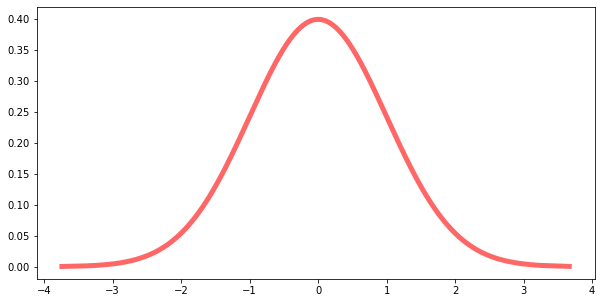

In [7]:
#Непрерывное нормальное распределение
plt.figure(figsize=(10,5))
f = sts.norm()
x = sts.norm.rvs(loc=0, scale=1, size=10000)
x.sort()
plt.plot(x, f.pdf(x), '-r', lw=5, alpha=0.6, label='Плотность распределения')

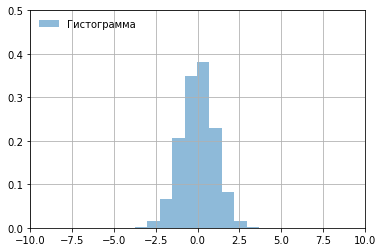

In [8]:
#Гистограмма
plt.hist(x, density=True, label='Гистограмма', alpha=0.5)

plt.legend(loc='upper left', frameon=False)
plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.grid(True)

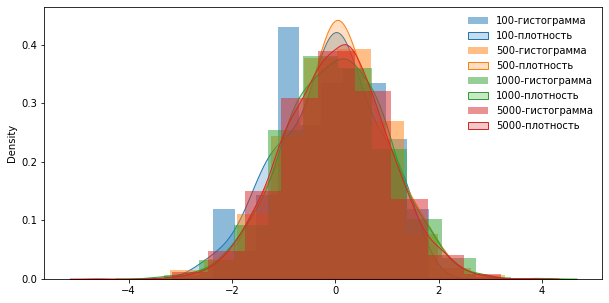

In [9]:
#ЦПТ
legends = ['100-гистограмма','100-плотность','500-гистограмма','500-плотность',
        '1000-гистограмма','1000-плотность','5000-гистограмма','5000-плотность']
plt.figure(figsize=(10,5))

for N in [100, 500, 1000, 5000]:

    #Гистограмма
    xs = sts.norm.rvs(loc=0, scale=1, size=N)
    plt.hist(xs, density=True, label='Гистограмма', alpha=0.5)

    #Мат.  ожидание и дисперсия
    mat_exp = np.mean(xs)
    disp = np.var(xs)

    #Теоретическое распределение 
    xs = sts.norm.rvs(loc=mat_exp, scale=disp, size=N)
    sns.kdeplot(xs, fill=True)

plt.legend(legends, loc='best', frameon=False)


(array([3.63672731e-05, 1.81836365e-05, 3.45489094e-04, 2.10930184e-03,
        8.52812554e-03, 1.66743947e-02, 1.91837366e-02, 1.00737346e-02,
        3.25487094e-03, 3.81856367e-04]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

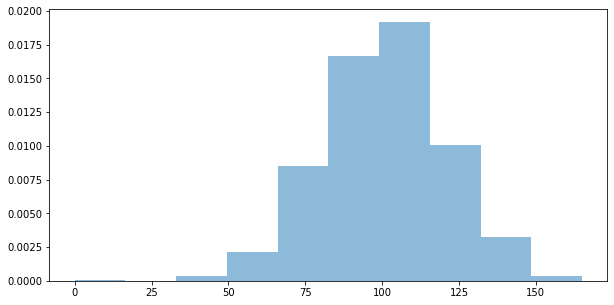

In [10]:
#CSV

results = []
with open('telecom_churn.csv', newline='') as file:  
    reader = csv.DictReader(file)
    for row in reader:
        results.append(row)
    #print(results)
total_day_calls = []
churn = []
yes = 0
no = 0
for res in results:
    total_day_calls.append(int(res['total day calls']))
    churn.append(res['churn'])
    if res['churn'] == 'True':
        yes += 1
    else:
        no += 1

plt.figure(figsize=(10,5))
plt.hist(total_day_calls, density=True, label='Гистограмма', alpha=0.5)


In [11]:
#Подсчет % для доверительного интервала
alpha0 = no / (yes + no)

#Доверительный интервал
mean = np.mean(total_day_calls)
scale0 = sts.sem(total_day_calls, ddof=1)
#disp = np.var(total_day_calls)
interval = sts.norm.interval(alpha=alpha0, loc=mean, scale=scale0)

Существует вероятность 85.51% что доверительный интервал (99.92890084548189, 100.94238628323099) содержит истинное среднее значение total day calls


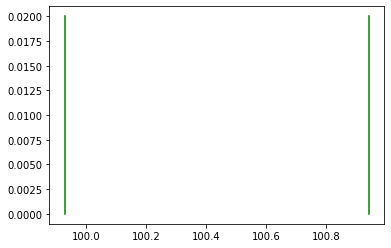

In [12]:
#Интервал на графике
xs = interval[0:1] + interval[0:1]
plt.plot(xs, [0, 0.02], color='g')
xs = interval[-1:] + interval[-1:]
plt.plot(xs, [0, 0.02], color='g')

print("Существует вероятность ",format(alpha0*100,'.2f'),"%",sep="",end=" ")
print("что доверительный интервал", interval, end=" ")
print("содержит истинное среднее значение total day calls")

z1 = (mean-interval[0]) / scale0

In [14]:
#ЦПТ с помощью statsmodels.stats.weightstats._zconfint_generic
zg = ssw._zconfint_generic(mean, scale0, alpha0, 'two-sided')

Явная формула z= 1.46 | Доп. формула z= 0.18


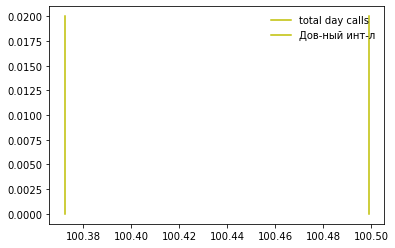

In [15]:
#Интервал2 на графике
xs = zg[0:1] + zg[0:1]
plt.plot(xs, [0, 0.02], color='y')
xs = zg[-1:] + zg[-1:]
plt.plot(xs, [0, 0.02], color='y')

z2 = (mean-zg[0]) / scale0

print("Явная формула z=", format(z1, '.2f'), "| Доп. формула z=", format(z2, '.2f'))

legends = ['total day calls', 'Дов-ный инт-л', 'Дов-ный инт-л','Дов-ный инт-л2', 'Дов-ный инт-л2']
plt.legend(legends, loc='upper right', frameon=False)
plt.show()